#Jester Collab
###*prepared by Nabil Affo*

In [52]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
from fastai.collab import *
from fastai.tabular import *

## Jester data

We use the Jester collaborative filters data dataset, available from https://www.kaggle.com/aakaashjois/jester-collaborative-filtering-dataset#UserRatings1.csv.
It is about rating 100 jokes.

In [0]:
item,text = 'JokeId','JokeText'

In [9]:
path=Config.data_path()/base_dir/'data/jester'
path 


PosixPath('/content/gdrive/My Drive/fastai-v3/data/jester')

In [19]:
jokes = pd.read_csv(path/'JokeText.csv', delimiter=',', header=None,
                      names=[item,text])
jokes.head()

,JokeId,JokeText
0,0,"A man visits the doctor. The doctor says ""I ha..."
1,1,This couple had an excellent relationship goin...
2,2,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,3,Q. What's the difference between a man and a t...
4,4,Q.\tWhat's O. J. Simpson's Internet address? \...


In [20]:
jokes_rates1 = pd.read_csv(path/'UserRatings1.csv',  delimiter=',', encoding='latin-1', header=None,
                    names=[item, *[f'user{i}' for i in range(16383)]])
jokes_rates1.head()

,JokeId,user0,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,user11,user12,user13,user14,user15,user16,user17,user18,user19,user20,user21,user22,user23,user24,user25,user26,user27,user28,user29,user30,user31,user32,user33,user34,user35,user36,user37,user38,...,user16343,user16344,user16345,user16346,user16347,user16348,user16349,user16350,user16351,user16352,user16353,user16354,user16355,user16356,user16357,user16358,user16359,user16360,user16361,user16362,user16363,user16364,user16365,user16366,user16367,user16368,user16369,user16370,user16371,user16372,user16373,user16374,user16375,user16376,user16377,user16378,user16379,user16380,user16381,user16382
0,0,5.10,-8.79,-3.50,7.14,-8.79,9.22,-4.03,3.11,-3.64,-7.67,3.06,-9.37,2.28,-1.17,6.75,8.40,7.38,6.07,-0.53,3.40,-7.86,-0.24,-2.86,6.94,9.17,-5.53,5.49,2.09,9.37,-0.87,0.19,-7.57,0.83,-7.96,0.49,-0.78,2.48,-4.03,0.58,...,4.17,4.32,6.50,-9.56,-1.17,4.71,-1.07,4.66,5.49,2.38,0.83,2.43,-7.04,3.25,8.54,-9.81,-7.33,9.27,1.94,4.03,-9.32,1.89,6.17,5.73,6.55,-5.39,-0.49,-2.72,-0.44,7.09,3.30,3.30,0.83,9.32,-3.93,-9.47,-7.28,-8.83,-9.90,3.11
1,1,4.90,-0.87,-2.91,-3.88,-0.58,9.37,-1.55,0.92,-3.35,-5.15,-8.25,9.13,1.75,3.64,8.25,3.16,4.85,3.40,-9.32,8.01,-1.84,1.17,6.07,8.69,7.86,6.55,1.02,1.50,4.17,2.28,4.81,-7.96,-2.48,-6.36,0.24,-4.27,-3.30,-7.77,2.38,...,6.80,-9.08,2.57,-9.85,1.17,4.32,-3.20,-0.05,1.89,2.38,-1.70,4.27,2.28,-1.89,-0.87,8.40,-2.14,-9.71,6.12,5.10,-8.25,7.67,3.16,8.45,6.12,0.53,3.74,6.26,-0.34,2.96,-1.55,1.50,-1.31,9.32,-5.05,4.42,-7.52,-2.48,-9.13,-0.29
2,2,1.75,1.99,-2.18,-3.06,-0.58,-3.93,-3.64,7.52,-6.46,-3.25,-3.98,9.27,-9.95,6.50,5.44,7.77,5.39,4.13,-8.74,-2.14,-7.86,1.17,-1.84,2.52,-5.29,5.49,-9.85,-3.64,-9.95,4.13,-1.21,-7.82,4.32,-9.56,4.27,2.82,0.34,1.84,-3.06,...,4.90,6.12,3.01,-0.58,-2.67,-0.10,-4.42,5.58,3.35,1.12,0.05,6.70,-7.91,1.46,0.53,9.37,-4.51,9.32,7.52,2.18,-9.03,-5.58,4.32,-4.56,5.05,7.28,-2.48,9.22,-9.61,2.23,3.30,-7.23,-1.89,9.32,-3.45,-1.46,-7.82,-7.33,-9.71,-4.42
3,3,-4.17,-4.61,-0.10,0.05,8.98,9.27,-6.99,0.49,-3.40,-1.65,-0.58,9.37,-9.47,4.51,1.80,-0.63,4.32,-3.16,-5.29,-8.06,-1.89,-7.91,1.60,1.41,-8.06,1.41,-6.31,-3.30,-3.40,-9.56,-0.19,-1.84,-3.88,-9.37,1.50,-7.62,-2.96,-5.83,-0.15,...,-3.54,-6.26,5.39,-7.77,-1.17,-4.13,0.34,-2.38,-2.38,-3.59,-1.02,-0.68,-7.91,4.76,3.88,9.13,-7.77,9.37,5.73,1.31,-9.85,-8.79,-0.44,-3.83,7.77,0.34,1.75,3.35,-9.47,-5.87,3.64,2.91,-2.38,9.32,-5.63,-8.74,-5.92,-8.83,-9.85,-2.52
4,4,5.15,5.39,7.52,6.26,7.67,3.45,5.44,-0.58,1.26,4.03,6.41,9.17,-3.20,5.87,5.68,7.91,-7.62,-9.56,-7.43,6.94,-6.17,7.23,-2.23,-0.39,8.25,1.07,-4.85,1.21,-9.71,1.46,0.63,-4.17,-9.32,1.21,5.15,2.43,2.43,4.66,-4.47,...,1.21,-2.52,-0.68,-8.79,3.45,3.45,-1.36,3.54,5.05,-5.29,-1.60,-0.49,1.99,-0.97,7.14,6.17,-9.51,9.37,2.18,2.52,-9.66,0.05,6.17,9.32,4.95,3.88,8.93,0.29,-4.42,-1.80,-1.07,7.91,3.59,7.52,-3.59,-3.01,0.73,1.46,-9.81,4.81


In [21]:
len(jokes)

100

In [25]:
jokes_rates2 = pd.read_csv(path/'UserRatings2.csv',  delimiter=',', encoding='latin-1', header=None,
                    names=[item, *[f'user{i}' for i in range(36711,53094)]])
jokes_rates2.head()

,JokeId,user36711,user36712,user36713,user36714,user36715,user36716,user36717,user36718,user36719,user36720,user36721,user36722,user36723,user36724,user36725,user36726,user36727,user36728,user36729,user36730,user36731,user36732,user36733,user36734,user36735,user36736,user36737,user36738,user36739,user36740,user36741,user36742,user36743,user36744,user36745,user36746,user36747,user36748,user36749,...,user53054,user53055,user53056,user53057,user53058,user53059,user53060,user53061,user53062,user53063,user53064,user53065,user53066,user53067,user53068,user53069,user53070,user53071,user53072,user53073,user53074,user53075,user53076,user53077,user53078,user53079,user53080,user53081,user53082,user53083,user53084,user53085,user53086,user53087,user53088,user53089,user53090,user53091,user53092,user53093
0,0,NaN,NaN,NaN,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.40,NaN,NaN,NaN,NaN,NaN,NaN,5.15,NaN,NaN,NaN,2.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.81,NaN,-8.2,NaN,NaN,NaN,NaN,-6.07,NaN,4.56,6.75,NaN,NaN,NaN,3.11,NaN,NaN,NaN,4.47,NaN,NaN,-9.85,NaN,-8.45,NaN,-0.44,-5.29,-2.18,-6.26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.58,NaN,NaN,NaN,NaN,NaN,9.32,1.07,NaN,NaN,NaN,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.68,1.07,8.11,-2.33,-5.83,8.2,-5.83,1.94,0.10,4.81,-8.2,-7.18,-3.3,0.58,4.61,8.93,6.46,-7.57,3.83,7.67,6.21,9.27,4.61,1.55,6.36,-9.37,4.37,-6.5,-9.51,-9.90,7.28,8.93,-6.41,-2.33,2.09,-1.26,8.01,-3.11,5.73,...,8.16,-9.47,6.99,-0.63,2.28,2.52,-7.52,-3.64,-1.99,7.48,-3.59,0.44,1.84,5.87,7.77,5.44,4.03,9.03,-0.97,5.53,8.2,3.98,7.96,-5.97,-8.98,-9.03,-0.63,-6.46,-4.51,3.2,-4.22,-0.24,-8.69,1.41,-9.03,-8.88,4.32,-6.31,-0.58,6.8


In [30]:
jokes_rates =jokes_rates1.merge(jokes_rates2)
jokes_rates.head()

,JokeId,user0,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,user11,user12,user13,user14,user15,user16,user17,user18,user19,user20,user21,user22,user23,user24,user25,user26,user27,user28,user29,user30,user31,user32,user33,user34,user35,user36,user37,user38,...,user53054,user53055,user53056,user53057,user53058,user53059,user53060,user53061,user53062,user53063,user53064,user53065,user53066,user53067,user53068,user53069,user53070,user53071,user53072,user53073,user53074,user53075,user53076,user53077,user53078,user53079,user53080,user53081,user53082,user53083,user53084,user53085,user53086,user53087,user53088,user53089,user53090,user53091,user53092,user53093
0,0,5.10,-8.79,-3.50,7.14,-8.79,9.22,-4.03,3.11,-3.64,-7.67,3.06,-9.37,2.28,-1.17,6.75,8.40,7.38,6.07,-0.53,3.40,-7.86,-0.24,-2.86,6.94,9.17,-5.53,5.49,2.09,9.37,-0.87,0.19,-7.57,0.83,-7.96,0.49,-0.78,2.48,-4.03,0.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4.90,-0.87,-2.91,-3.88,-0.58,9.37,-1.55,0.92,-3.35,-5.15,-8.25,9.13,1.75,3.64,8.25,3.16,4.85,3.40,-9.32,8.01,-1.84,1.17,6.07,8.69,7.86,6.55,1.02,1.50,4.17,2.28,4.81,-7.96,-2.48,-6.36,0.24,-4.27,-3.30,-7.77,2.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.75,1.99,-2.18,-3.06,-0.58,-3.93,-3.64,7.52,-6.46,-3.25,-3.98,9.27,-9.95,6.50,5.44,7.77,5.39,4.13,-8.74,-2.14,-7.86,1.17,-1.84,2.52,-5.29,5.49,-9.85,-3.64,-9.95,4.13,-1.21,-7.82,4.32,-9.56,4.27,2.82,0.34,1.84,-3.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,-4.17,-4.61,-0.10,0.05,8.98,9.27,-6.99,0.49,-3.40,-1.65,-0.58,9.37,-9.47,4.51,1.80,-0.63,4.32,-3.16,-5.29,-8.06,-1.89,-7.91,1.60,1.41,-8.06,1.41,-6.31,-3.30,-3.40,-9.56,-0.19,-1.84,-3.88,-9.37,1.50,-7.62,-2.96,-5.83,-0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.15,5.39,7.52,6.26,7.67,3.45,5.44,-0.58,1.26,4.03,6.41,9.17,-3.20,5.87,5.68,7.91,-7.62,-9.56,-7.43,6.94,-6.17,7.23,-2.23,-0.39,8.25,1.07,-4.85,1.21,-9.71,1.46,0.63,-4.17,-9.32,1.21,5.15,2.43,2.43,4.66,-4.47,...,8.16,-9.47,6.99,-0.63,2.28,2.52,-7.52,-3.64,-1.99,7.48,-3.59,0.44,1.84,5.87,7.77,5.44,4.03,9.03,-0.97,5.53,8.2,3.98,7.96,-5.97,-8.98,-9.03,-0.63,-6.46,-4.51,3.2,-4.22,-0.24,-8.69,1.41,-9.03,-8.88,4.32,-6.31,-0.58,6.8


In [36]:


rating_jokes = jokes.merge(jokes_rates)
rating_jokes.head()

,JokeId,JokeText,user0,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,user11,user12,user13,user14,user15,user16,user17,user18,user19,user20,user21,user22,user23,user24,user25,user26,user27,user28,user29,user30,user31,user32,user33,user34,user35,user36,user37,...,user53054,user53055,user53056,user53057,user53058,user53059,user53060,user53061,user53062,user53063,user53064,user53065,user53066,user53067,user53068,user53069,user53070,user53071,user53072,user53073,user53074,user53075,user53076,user53077,user53078,user53079,user53080,user53081,user53082,user53083,user53084,user53085,user53086,user53087,user53088,user53089,user53090,user53091,user53092,user53093
0,0,"A man visits the doctor. The doctor says ""I ha...",5.10,-8.79,-3.50,7.14,-8.79,9.22,-4.03,3.11,-3.64,-7.67,3.06,-9.37,2.28,-1.17,6.75,8.40,7.38,6.07,-0.53,3.40,-7.86,-0.24,-2.86,6.94,9.17,-5.53,5.49,2.09,9.37,-0.87,0.19,-7.57,0.83,-7.96,0.49,-0.78,2.48,-4.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,This couple had an excellent relationship goin...,4.90,-0.87,-2.91,-3.88,-0.58,9.37,-1.55,0.92,-3.35,-5.15,-8.25,9.13,1.75,3.64,8.25,3.16,4.85,3.40,-9.32,8.01,-1.84,1.17,6.07,8.69,7.86,6.55,1.02,1.50,4.17,2.28,4.81,-7.96,-2.48,-6.36,0.24,-4.27,-3.30,-7.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Q. What's 200 feet long and has 4 teeth? \n\nA...,1.75,1.99,-2.18,-3.06,-0.58,-3.93,-3.64,7.52,-6.46,-3.25,-3.98,9.27,-9.95,6.50,5.44,7.77,5.39,4.13,-8.74,-2.14,-7.86,1.17,-1.84,2.52,-5.29,5.49,-9.85,-3.64,-9.95,4.13,-1.21,-7.82,4.32,-9.56,4.27,2.82,0.34,1.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Q. What's the difference between a man and a t...,-4.17,-4.61,-0.10,0.05,8.98,9.27,-6.99,0.49,-3.40,-1.65,-0.58,9.37,-9.47,4.51,1.80,-0.63,4.32,-3.16,-5.29,-8.06,-1.89,-7.91,1.60,1.41,-8.06,1.41,-6.31,-3.30,-3.40,-9.56,-0.19,-1.84,-3.88,-9.37,1.50,-7.62,-2.96,-5.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Q.\tWhat's O. J. Simpson's Internet address? \...,5.15,5.39,7.52,6.26,7.67,3.45,5.44,-0.58,1.26,4.03,6.41,9.17,-3.20,5.87,5.68,7.91,-7.62,-9.56,-7.43,6.94,-6.17,7.23,-2.23,-0.39,8.25,1.07,-4.85,1.21,-9.71,1.46,0.63,-4.17,-9.32,1.21,5.15,2.43,2.43,4.66,...,8.16,-9.47,6.99,-0.63,2.28,2.52,-7.52,-3.64,-1.99,7.48,-3.59,0.44,1.84,5.87,7.77,5.44,4.03,9.03,-0.97,5.53,8.2,3.98,7.96,-5.97,-8.98,-9.03,-0.63,-6.46,-4.51,3.2,-4.22,-0.24,-8.69,1.41,-9.03,-8.88,4.32,-6.31,-0.58,6.8


In [0]:
data = CollabDataBunch.from_df(rating_jokes, seed=42, valid_pct=0.1, item_name=text)

In [38]:
data.show_batch()

JokeId,JokeText,target
27,"A mechanical, electrical and a software engineer from Microsoft were\ndriving through the desert when the car broke down. The mechanical\nengineer said ""It seems to be a problem with the fuel injection system,\nwhy don't we pop the hood and I'll take a look at it."" To which the\nelectrical engineer replied, ""No I think it's just a loose ground wire,\nI'll get out and take a look."" Then, the Microsoft engineer jumps in.\n""No, no, no. If we just close up all the windows, get out, wait a few\nminutes, get back in, and then reopen the windows everything will work\nfine.""\n",1.5
92,"Reaching the end of a job interview, the human resources person asked a\nyoung engineer fresh out of Stanford,\n\n""And what starting salary were you looking for?""\n\nThe engineer said, ""In the neighborhood of $125,000 a year, depending\non the benefits package.""\n\nThe interviewer said, ""Well, what would you say to a package of 5-weeks \nvacation, 14 paid holidays, full medical and dental, company matching \nretirement fund to 50% of salary, and a company car leased every 2 years - \nsay, a red Corvette?""\n\nThe Engineer sat up straight and said, ""Wow! Are you kidding?""\n\nAnd the interviewer replied, ""Yeah, but you started it.""\n",3.59
72,"Q: What is the difference between George Washington, Richard Nixon,\nand Bill Clinton?\n\nA: Washington couldn't tell a lie, Nixon couldn't tell the truth, and\nClinton doesn't know the difference.\n",7.72
25,"A guy walks into a bar and sits down next to an extremely gorgeous \nwoman. The first thing he notices about her though, are her pants. \nThey were skin-tight, high-waisted and had no obvious mechanism \n(zipper, buttons or velcro) for opening them.\n\nAfter several minutes of puzzling over how she got the pants up over \nher hips, he finally worked up the nerve to ask her. ""Excuse me miss, \nbut how do you get into your pants?""\n\n""Well,"" she replied, ""you can start by buying me a drink.""\n",-3.93
76,If pro- is the opposite of con- then congress must be the opposite\nof progress.\n,8.54


In [0]:
y_range = [-10.5,10.5] #sigmoid for final activation, 10.5 is to be able to predict 10

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1) #factors= weights size

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


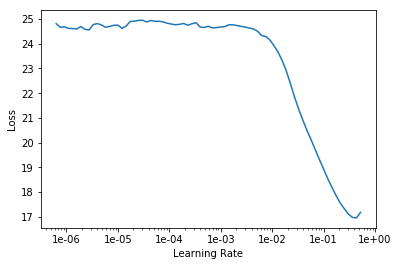

In [43]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [44]:
learn.fit_one_cycle(5, 2e-2)

epoch,train_loss,valid_loss,time
0,24.248436,35.192333,00:00
1,24.244116,35.192303,00:00
2,23.390633,35.192280,00:00
3,23.091198,35.192265,00:00
4,22.075474,35.192261,00:00


In [0]:
learn.save('dotprod')